**ChurnGuard**: *Predictive Customer Churn Analysis with Decision Trees*



In this project, I crafted a cutting-edge predictive model foreseeing customer churn (attrition) by harnessing the power of a Decision Tree classifier.

Customer churn refers to the phenomenon where customers
cease using a product or service.

Through an in-depth analysis of historical data and customer traits, I meticulously constructed a Decision Tree model, empowering businesses to pinpoint pivotal churn patterns and proactively secure the loyalty of their cherished clientele.

Data dictionary for the attributes in Telco Customer Churn dataset:

1. **customerID**: Unique identifier for each customer.
2. **gender**: Gender of the customer (e.g., Male or Female).
3. **SeniorCitizen**: Whether the customer is a senior citizen (0: No, 1: Yes).
4. **Partner**: Whether the customer has a partner (Yes or No).
5. **Dependents**: Whether the customer has dependents (Yes or No).
6. **tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Whether the customer has phone service (Yes or No).
8. **MultipleLines**: Whether the customer has multiple lines (e.g., No phone service, Yes, No).
9. **InternetService**: Type of internet service the customer has (e.g., DSL, Fiber optic, No).
10. **OnlineSecurity**: Whether the customer has online security service (Yes, No, No internet service).
11. **OnlineBackup**: Whether the customer has online backup service (Yes, No, No internet service).
12. **DeviceProtection**: Whether the customer has device protection service (Yes, No, No internet service).
13. **TechSupport**: Whether the customer has tech support service (Yes, No, No internet service).
14. **StreamingTV**: Whether the customer has streaming TV service (Yes, No, No internet service).
15. **StreamingMovies**: Whether the customer has streaming movie service (Yes, No, No internet service).
16. **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Whether the customer has paperless billing (Yes or No).
18. **PaymentMethod**: The method the customer uses to make payments (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
19. **MonthlyCharges**: The amount the customer is charged per month.
20. **TotalCharges**: The total amount charged to the customer.
21. **Churn**: Whether the customer churned (left the company) or not (Yes or No).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency



In [ ]:
# Load the dataset
df = pd.read_csv('ML Project 4.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes




**What is the distribution of gender among the customers?**






In [ ]:
# Exploratory Data Analysis (EDA)
# 1. Gender Distribution
gender_distribution = df['gender'].value_counts()
print("Gender Distribution:")
print(gender_distribution)



Gender Distribution:
Male      3549
Female    3483
Name: gender, dtype: int64





**How many customers are senior citizens?**



In [ ]:
# 2. Senior Citizens
senior_citizens = df['SeniorCitizen'].value_counts()
print("\nSenior Citizens:")
print(senior_citizens)




Senior Citizens:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64


**What is the proportion of customers with partners and dependents?**


In [ ]:
# 3. Proportion of Customers with Partners and Dependents
partner_dependents = df.groupby(['Partner', 'Dependents']).size()
print("\nProportion of Customers with Partners and Dependents:")
print(partner_dependents)




Proportion of Customers with Partners and Dependents:
Partner  Dependents
No       No            3280
         Yes            359
Yes      No            1653
         Yes           1740
dtype: int64


**What is the distribution of tenure (the number of months a customer has stayed)?**


In [ ]:
# 4. Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()



**How many customers have phone service? How many have multiple lines?**


In [ ]:
# 5. Phone Service and Multiple Lines
phone_service = df['PhoneService'].value_counts()
multiple_lines = df['MultipleLines'].value_counts()
print("\nPhone Service:")
print(phone_service)
print("\nMultiple Lines:")
print(multiple_lines)




Phone Service:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Multiple Lines:
No     4065
Yes    2967
Name: MultipleLines, dtype: int64


**What is the distribution of different types of internet services used?**


In [ ]:
# 6. Distribution of Internet Services
internet_service = df['InternetService'].value_counts()
print("\nDistribution of Internet Services:")
print(internet_service)




Distribution of Internet Services:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64



*   How many customers have opted for online security, online backup, device protection, and tech support?

*   How many customers are using streaming TV and streaming movies?

In [ ]:
# 7. Services Usage
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
services_usage = df[services_cols].apply(pd.Series.value_counts)
print("\nServices Usage:")
print(services_usage)




Services Usage:
     OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
No             5017          4607              4614         4992         4329   
Yes            2015          2425              2418         2040         2703   

     StreamingMovies  
No              4301  
Yes             2731  



**What is the distribution of contract types?**


In [ ]:
# 8. Distribution of Contract Types
contract_types = df['Contract'].value_counts()
print("\nDistribution of Contract Types:")
print(contract_types)




Distribution of Contract Types:
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


 **How many customers have paperless billing?**
   

In [ ]:
# 9. Paperless Billing
paperless_billing = df['PaperlessBilling'].value_counts()
print("\nPaperless Billing:")
print(paperless_billing)




Paperless Billing:
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


**What are the different payment methods used by customers?**

In [ ]:
# 10. Payment Methods
payment_methods = df['PaymentMethod'].value_counts()
print("\nPayment Methods:")
print(payment_methods)




Payment Methods:
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


**Churn Analysis:**
   - What is the overall churn rate in the dataset?
   - How does churn rate vary based on gender, senior citizen status, partner status, and dependent status?
   - Is there a correlation between tenure and churn rate?
   - How does churn vary across different types of services (e.g., online security, streaming services)?
   - Does the contract type influence churn?

In [ ]:
# Churn Analysis
churn_rate = df['Churn'].value_counts(normalize=True)
churn_gender = df.groupby('gender')['Churn'].value_counts(normalize=True)
churn_senior_partner_dependents = df.groupby(['SeniorCitizen', 'Partner', 'Dependents'])['Churn'].value_counts(normalize=True)

# Convert 'Churn' column to numeric (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)





In [ ]:
churn_vs_tenure = df.groupby('tenure')['Churn'].mean()
churn_vs_services = df.groupby(services_cols)['Churn'].mean()
churn_vs_contract = df.groupby('Contract')['Churn'].mean()

# Feature Correlation
correlation_matrix = df[['MonthlyCharges', 'TotalCharges']].corr()

# Print the results
print("\nChurn Rate:")
print(churn_rate)


Churn Rate:
No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


In [ ]:
print("\nChurn Rate by Gender:")
print(churn_gender)



Churn Rate by Gender:
gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: Churn, dtype: float64


In [ ]:
print("\nChurn Rate by Senior Citizen, Partner, and Dependents:")
print(churn_senior_partner_dependents)



Churn Rate by Senior Citizen, Partner, and Dependents:
SeniorCitizen  Partner  Dependents  Churn
0              No       No          No       0.688488
                                    Yes      0.311512
                        Yes         No       0.786325
                                    Yes      0.213675
               Yes      No          No       0.791917
                                    Yes      0.208083
                        Yes         No       0.861798
                                    Yes      0.138202
1              No       No          No       0.508021
                                    Yes      0.491979
                        Yes         No       0.750000
                                    Yes      0.250000
               Yes      No          No       0.636735
                                    Yes      0.363265
                        Yes         No       0.759036
                                    Yes      0.240964
Name: Churn, dtype: float64


In [ ]:
print("\nChurn Rate vs Tenure:")
print(churn_vs_tenure)



Churn Rate vs Tenure:
tenure
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 72, dtype: float64


In [ ]:
print("\nChurn Rate vs Services:")
print(churn_vs_services)



Churn Rate vs Services:
OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
No              No            No                No           No           No                 0.214641
                                                                          Yes                0.648649
                                                             Yes          No                 0.614035
                                                                          Yes                0.600917
                                                Yes          No           No                 0.264706
                                                                                               ...   
Yes             Yes           Yes               No           Yes          Yes                0.142857
                                                Yes          No           No                 0.045455
                                                                     

In [ ]:
print("\nChurn Rate vs Contract:")
print(churn_vs_contract)



Churn Rate vs Contract:
Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


In [ ]:
print("\nFeature Correlation Matrix:")
print(correlation_matrix)


Feature Correlation Matrix:
                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651065
TotalCharges          0.651065      1.000000


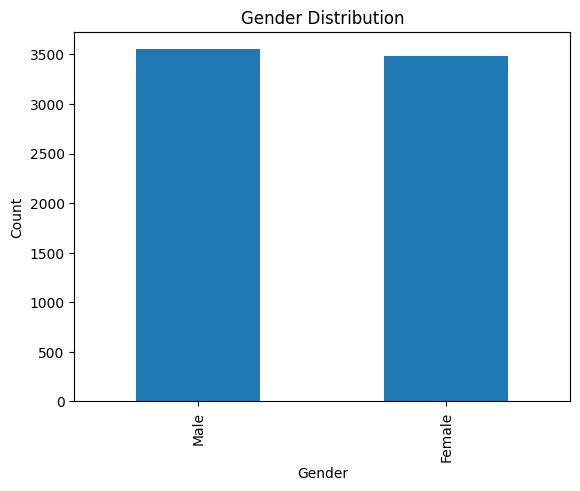

In [ ]:
# EDA PLOTTING
# 1. Gender Distribution
gender_distribution = df['gender'].value_counts()
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


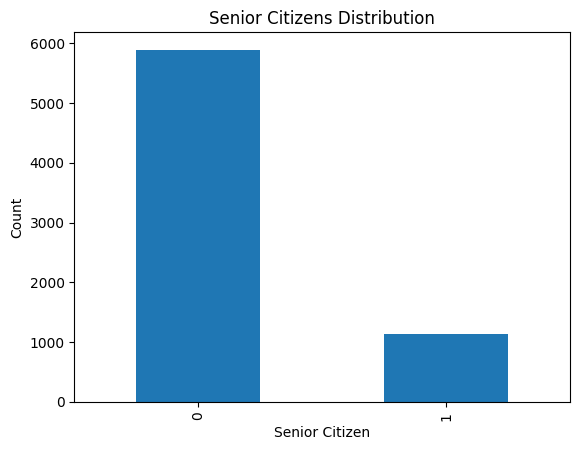

In [ ]:
# 2. Senior Citizens
senior_citizens = df['SeniorCitizen'].value_counts()
senior_citizens.plot(kind='bar')
plt.title('Senior Citizens Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()




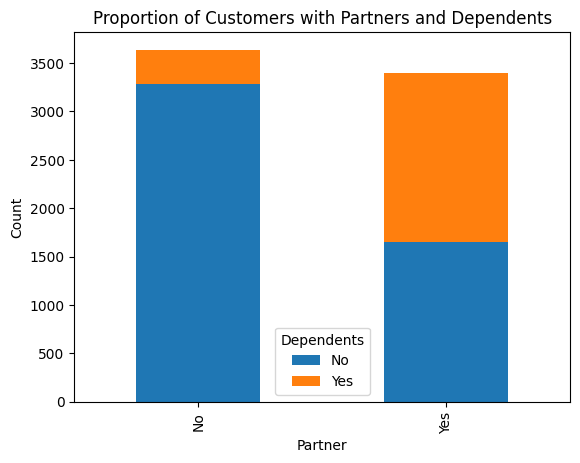

In [ ]:
# 3. Proportion of Customers with Partners and Dependents
partner_dependents = df.groupby(['Partner', 'Dependents']).size()
partner_dependents.unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Customers with Partners and Dependents')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()



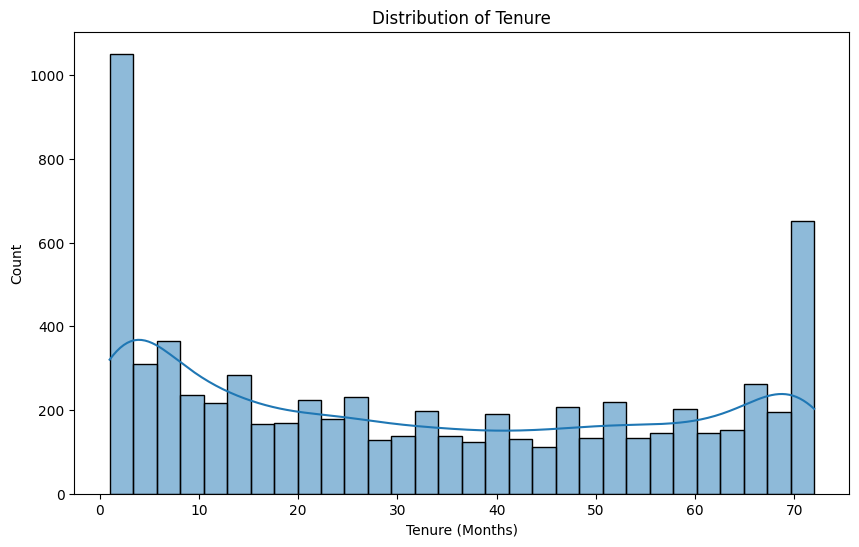

In [ ]:
# 4. Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()



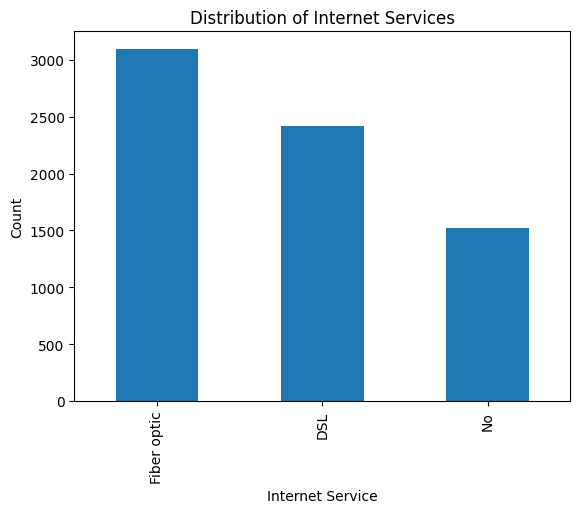

In [ ]:
# 6. Distribution of Internet Services
internet_service = df['InternetService'].value_counts()
internet_service.plot(kind='bar')
plt.title('Distribution of Internet Services')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

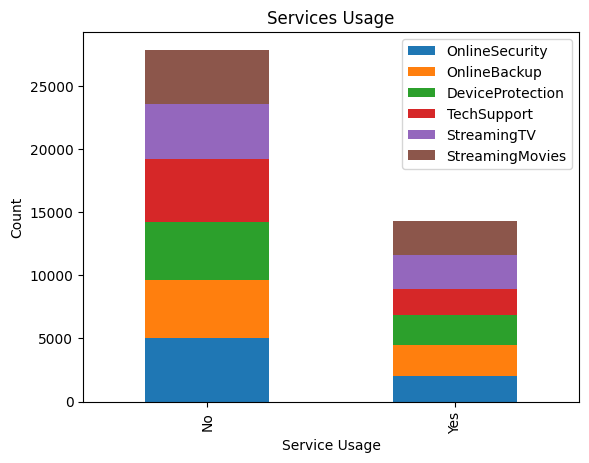

In [ ]:
# 7. Services Usage
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
services_usage = df[services_cols].apply(pd.Series.value_counts)
services_usage.plot(kind='bar', stacked=True)
plt.title('Services Usage')
plt.xlabel('Service Usage')
plt.ylabel('Count')
plt.show()





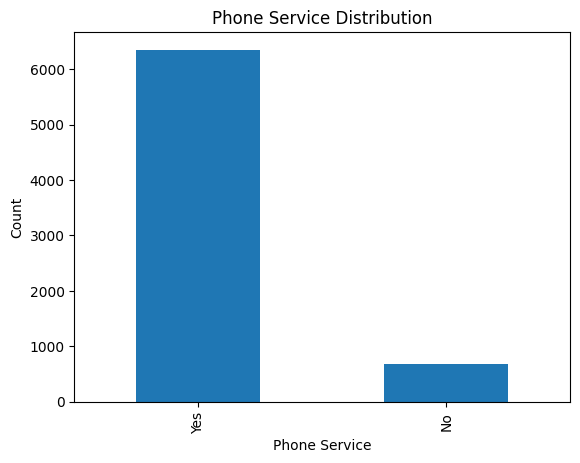

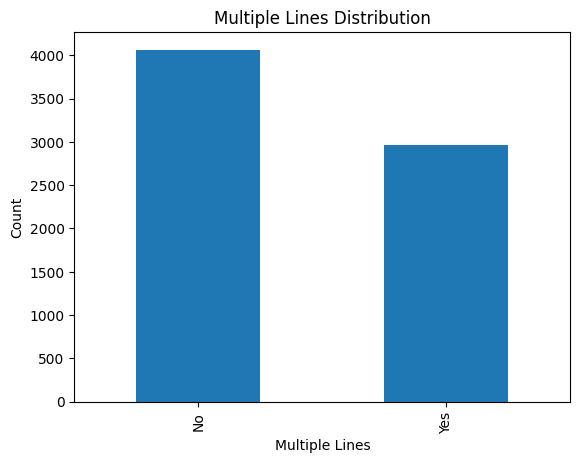

In [ ]:
# 5. Phone Service and Multiple Lines
phone_service = df['PhoneService'].value_counts()
phone_service.plot(kind='bar')
plt.title('Phone Service Distribution')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

multiple_lines = df['MultipleLines'].value_counts()
multiple_lines.plot(kind='bar')
plt.title('Multiple Lines Distribution')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()





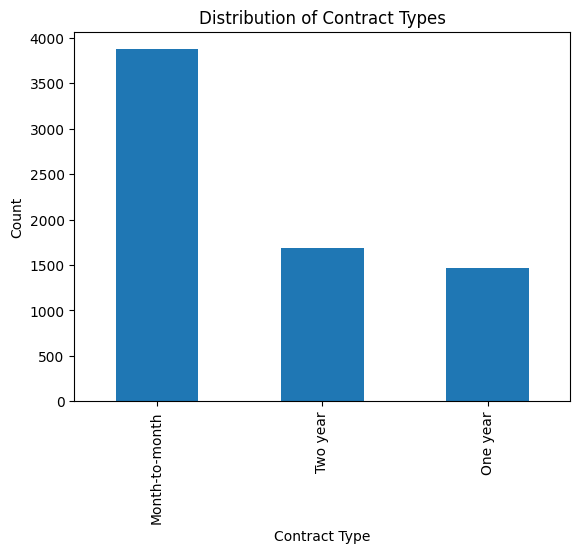

In [ ]:
# 8. Distribution of Contract Types
contract_types = df['Contract'].value_counts()
contract_types.plot(kind='bar')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

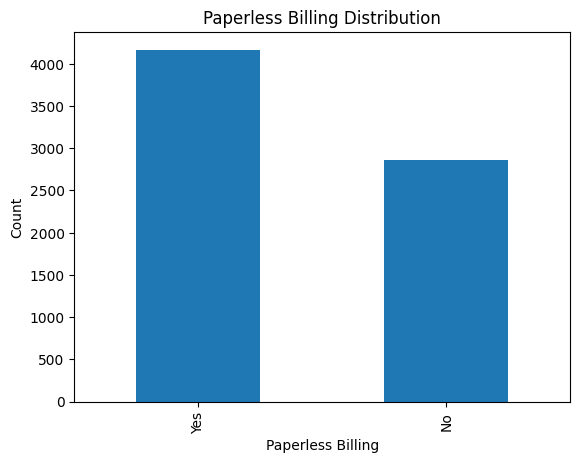

In [ ]:
# 9. Paperless Billing
paperless_billing = df['PaperlessBilling'].value_counts()
paperless_billing.plot(kind='bar')
plt.title('Paperless Billing Distribution')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()



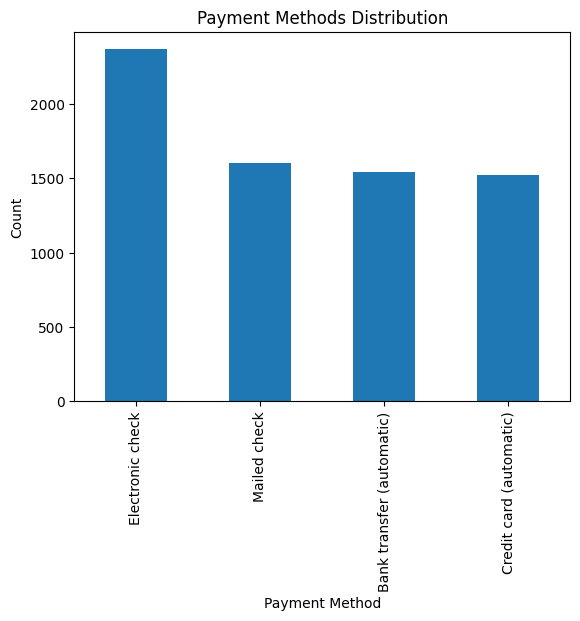

In [ ]:
# 10. Payment Methods
payment_methods = df['PaymentMethod'].value_counts()
payment_methods.plot(kind='bar')
plt.title('Payment Methods Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()



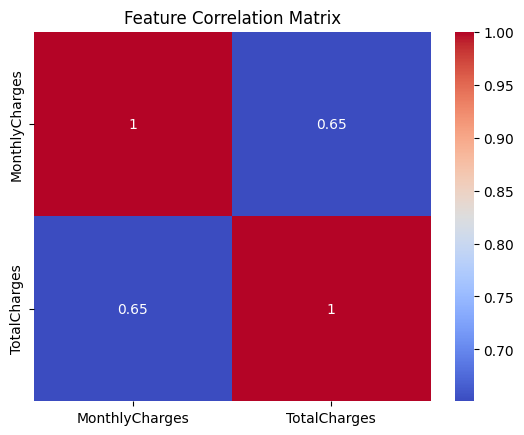

In [ ]:
# Feature Correlation
correlation_matrix = df[['MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

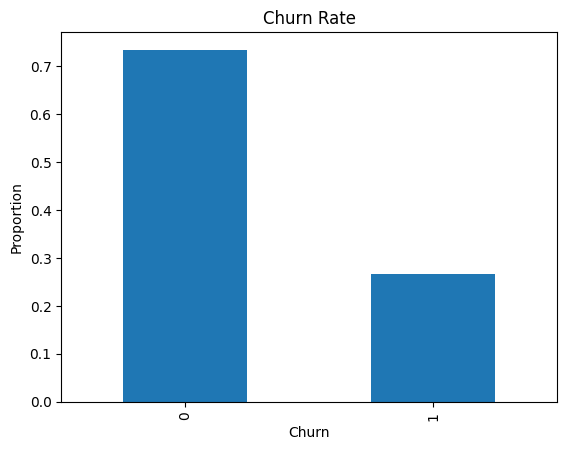

In [ ]:
# Churn Analysis
# 1. Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='bar')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()



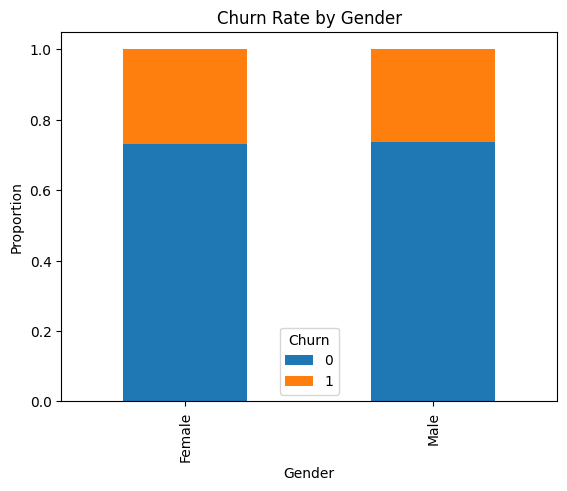

In [ ]:
# 2. Churn Rate by Gender
churn_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
churn_gender.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()



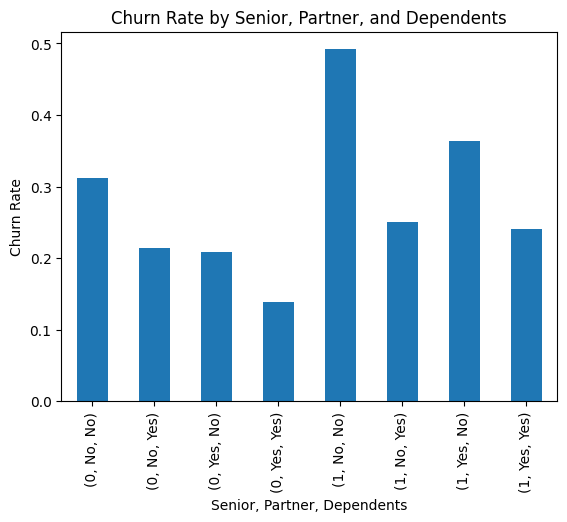

In [ ]:
# 3. Churn Rate by Senior, Partner, and Dependents
churn_senior_partner_dependents = df.groupby(['SeniorCitizen', 'Partner', 'Dependents'])['Churn'].mean()
churn_senior_partner_dependents.plot(kind='bar')
plt.title('Churn Rate by Senior, Partner, and Dependents')
plt.xlabel('Senior, Partner, Dependents')
plt.ylabel('Churn Rate')
plt.show()



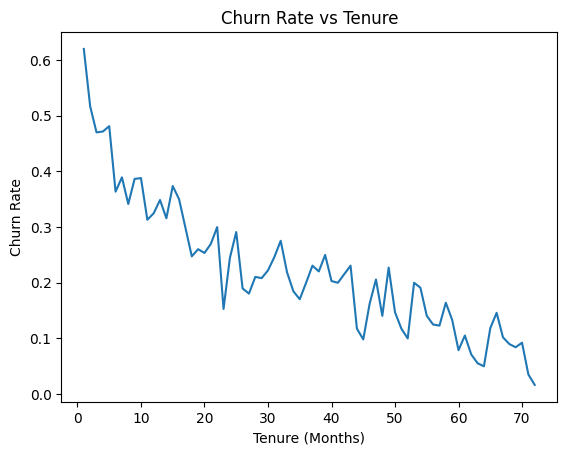

In [ ]:
# 4. Churn Rate vs Tenure
churn_vs_tenure = df.groupby('tenure')['Churn'].mean()
churn_vs_tenure.plot()
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.show()



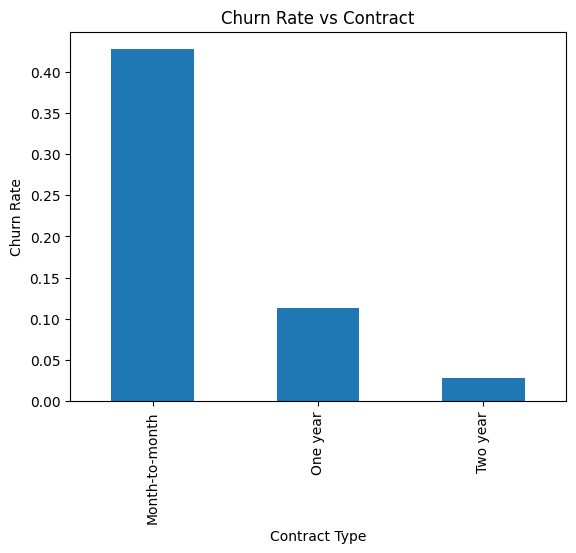

In [ ]:
# 6. Churn Rate vs Contract
churn_vs_contract = df.groupby('Contract')['Churn'].mean()
churn_vs_contract.plot(kind='bar')
plt.title('Churn Rate vs Contract')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


Calculating churn rates for different services, contract terms, and billing methods using the groupby function.


In [ ]:
# Calculate churn rates for different services, contract terms, and billing methods
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
contract_terms = df['Contract'].unique()
billing_methods = df['PaymentMethod'].unique()

churn_rates_services = df.groupby(services_cols)['Churn'].mean()
churn_rates_contract = df.groupby('Contract')['Churn'].mean()
churn_rates_billing = df.groupby('PaymentMethod')['Churn'].mean()

print("Churn Rates by Services:")
print(churn_rates_services)

print("\nChurn Rates by Contract Terms:")
print(churn_rates_contract)

print("\nChurn Rates by Billing Methods:")
print(churn_rates_billing)



Churn Rates by Services:
OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
No              No            No                No           No           No                 0.214641
                                                                          Yes                0.648649
                                                             Yes          No                 0.614035
                                                                          Yes                0.600917
                                                Yes          No           No                 0.264706
                                                                                               ...   
Yes             Yes           Yes               No           Yes          Yes                0.142857
                                                Yes          No           No                 0.045455
                                                                     

Performing a Chi-squared test for independence to determine whether there's a significant association between categorical variables (InternetService, Contract, PaymentMethod) and the target variable (Churn).

The Chi-squared test helps to understand whether the distribution of churn across different categories is significantly different from what you would expect by chance.

If the p-value from the Chi-squared test is below a certain threshold (e.g., 0.05), it suggests that the feature is likely associated with the target variable.

In [ ]:
# Perform Chi-squared test for independence for categorical variables
def perform_chi2_test(data, feature, target):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Performing Chi-squared test for a feature
feature = 'InternetService'
chi2, p = perform_chi2_test(df, feature, 'Churn')
print(f"\nChi-squared test for {feature}:")
print("Chi-squared:", chi2)
print("P-value:", p)

# Performing Chi-squared test for a feature
feature = 'Contract'
chi2, p = perform_chi2_test(df, feature, 'Churn')
print(f"\nChi-squared test for {feature}:")
print("Chi-squared:", chi2)
print("P-value:", p)

# Performing Chi-squared test for a feature
feature = 'PaymentMethod'
chi2, p = perform_chi2_test(df, feature, 'Churn')
print(f"\nChi-squared test for {feature}:")
print("Chi-squared:", chi2)
print("P-value:", p)



Chi-squared test for InternetService:
Chi-squared: 728.6956143058694
P-value: 5.831198962237274e-159

Chi-squared test for Contract:
Chi-squared: 1179.5458287339445
P-value: 7.326182186265472e-257

Chi-squared test for PaymentMethod:
Chi-squared: 645.4299001234638
P-value: 1.4263098511063342e-139


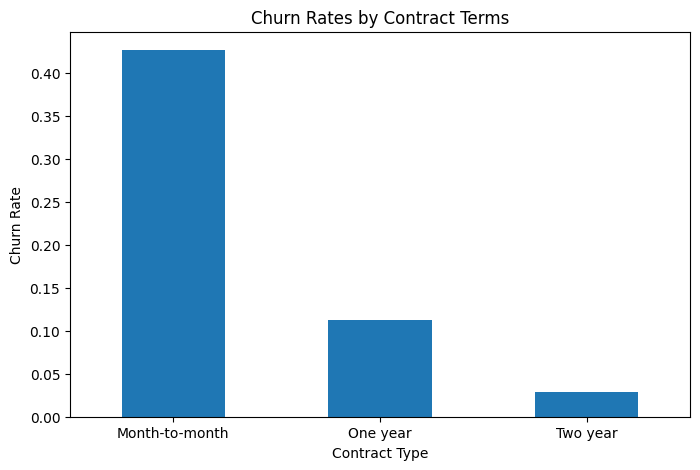

In [ ]:
# Calculate churn rates for different services, contract terms, and billing methods
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
contract_terms = df['Contract'].unique()
billing_methods = df['PaymentMethod'].unique()

churn_rates_contract = df.groupby('Contract')['Churn'].mean()
churn_rates_billing = df.groupby('PaymentMethod')['Churn'].mean()


# Plot Churn Rates by Contract Terms
churn_rates_contract.plot(kind='bar', figsize=(8, 5))
plt.title('Churn Rates by Contract Terms')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()



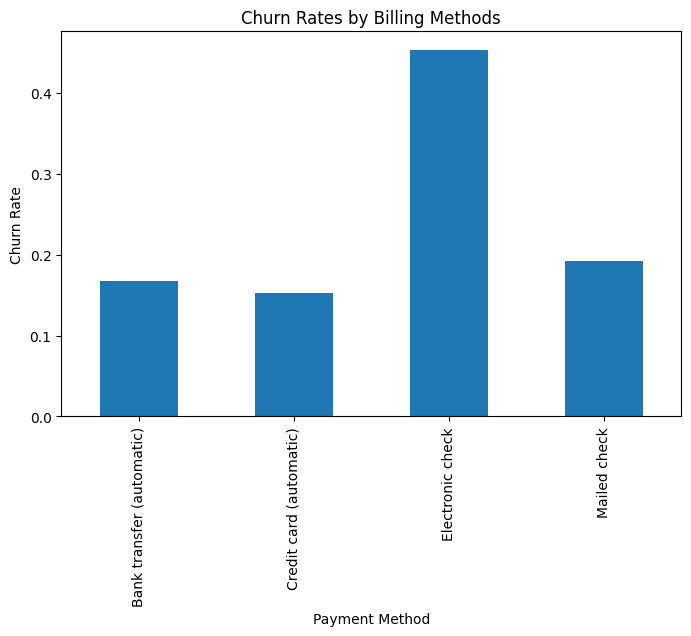

In [ ]:
# Plot Churn Rates by Billing Methods
churn_rates_billing.plot(kind='bar', figsize=(8, 5))
plt.title('Churn Rates by Billing Methods')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()


**Customer Segmentation:**
   - Customer Segmentation based on their tenure and monthly charges.
   - Do certain segments have a higher churn rate than others?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

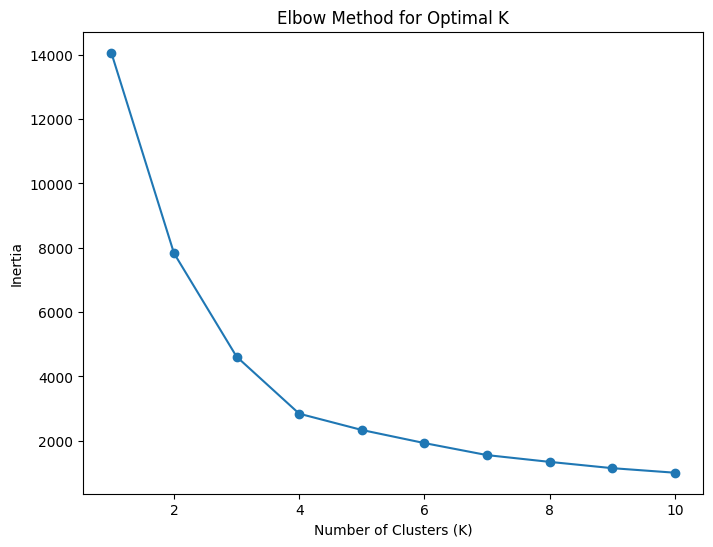

In [ ]:
# Select relevant features for segmentation
segmentation_features = ['tenure', 'MonthlyCharges']
segmentation_data = df[segmentation_features]

# Standardize the features
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Find the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



In [ ]:
# Based on the elbow method, appropriate number of clusters (K)
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(segmentation_data_scaled)

# Add the cluster labels to the dataset
df['Cluster'] = cluster_labels

# Calculate churn rate per cluster
churn_rate_per_cluster = df.groupby('Cluster')['Churn'].mean()

print("Churn Rate per Cluster:")
print(churn_rate_per_cluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Churn Rate per Cluster:
Cluster
0    0.156716
1    0.476482
2    0.124357
Name: Churn, dtype: float64


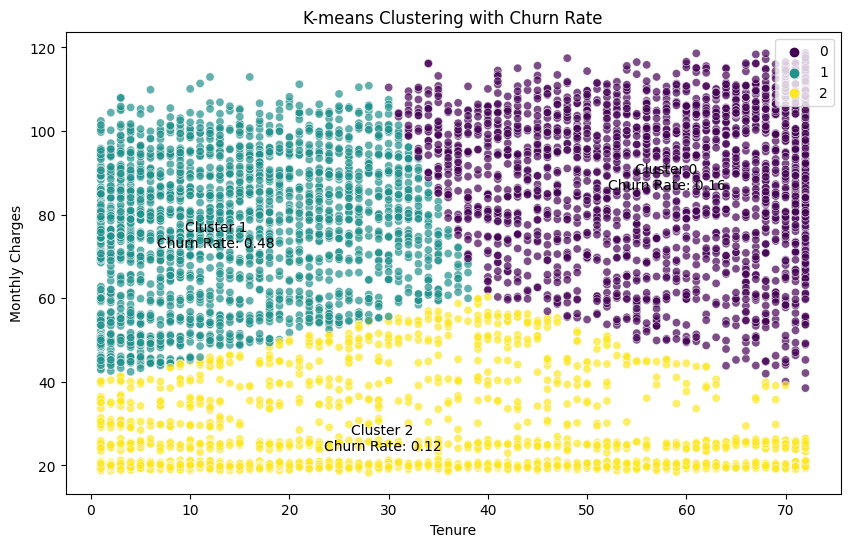

In [ ]:
# Plot K-means clustering results with churn rate
plt.figure(figsize=(10, 6))

# Scatter plot of clusters based on segmentation features
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis', alpha=0.7)

# Annotate clusters with churn rate
for cluster, churn_rate in churn_rate_per_cluster.items():
    cluster_data = df[df['Cluster'] == cluster]
    plt.annotate(f"Cluster {cluster}\nChurn Rate: {churn_rate:.2f}",
                 (cluster_data['tenure'].mean(), cluster_data['MonthlyCharges'].mean()),
                 fontsize=10, color='black', ha='center', va='center')

plt.title('K-means Clustering with Churn Rate')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(loc='upper right')
plt.show()


**Customer Lifetime Value (CLV):**
   - Estimation of the CLV for different segments of customers?
   - How does CLV differ between churned and non-churned customers?

In [ ]:
# Calculate CLV for each customer
def calculate_clv(row):
    # Calculate average monthly revenue
    avg_monthly_revenue = row['TotalCharges'] / row['tenure']

    # Average customer lifespan (in months) calculated using Excel
    avg_lifespan = 32

    # Calculate CLV (average monthly revenue * average lifespan)
    clv = avg_monthly_revenue * avg_lifespan
    return clv

df['CLV'] = df.apply(calculate_clv, axis=1)

# Calculate average CLV for churned and non-churned customers
average_clv_churned = df[df['Churn'] == 1]['CLV'].mean()
average_clv_non_churned = df[df['Churn'] == 0]['CLV'].mean()

print("Average CLV for Churned Customers:", average_clv_churned)
print("Average CLV for Non-Churned Customers:", average_clv_non_churned)


Average CLV for Churned Customers: 2381.860939021842
Average CLV for Non-Churned Customers: 1961.9847741323524


In [ ]:
# Convert categorical variables into dummy/indicator variables
categorical_cols = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # 'Churn_Yes' is the target variable
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Get the coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("\nMost Significant Predictors:")
print(coefficients)


Accuracy: 0.7839374555792467

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1033
           1       0.75      0.28      0.41       374

    accuracy                           0.78      1407
   macro avg       0.77      0.62      0.64      1407
weighted avg       0.78      0.78      0.75      1407


Most Significant Predictors:
                             Feature  Coefficient
7042     InternetService_Fiber optic     0.576932
7054  PaymentMethod_Electronic check     0.456841
5                                CLV     0.331261
2                     MonthlyCharges     0.329025
7052            PaperlessBilling_Yes     0.292994
...                              ...          ...
7043              InternetService_No    -0.418421
7050               Contract_One year    -0.470648
3                       TotalCharges    -0.480382
7051               Contract_Two year    -0.535749
1                             tenure   

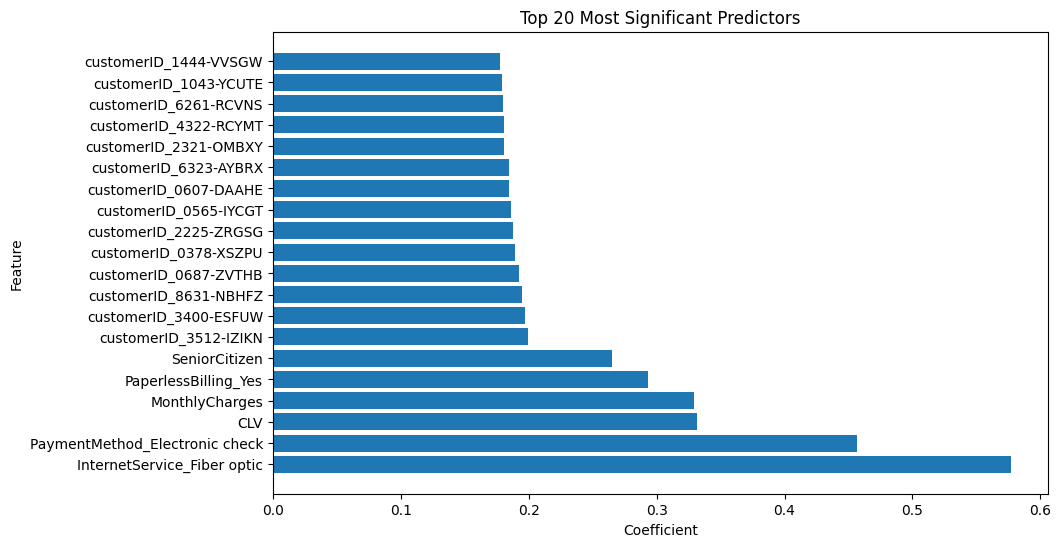

In [ ]:
# Plot the top 20 most significant predictors
top_20_coefficients = coefficients.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_coefficients['Feature'], top_20_coefficients['Coefficient'])
plt.title('Top 20 Most Significant Predictors')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Build a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances_df)


Feature Importances:
                          Feature  Importance
3                    TotalCharges    0.095035
1                          tenure    0.091439
5                             CLV    0.076512
2                  MonthlyCharges    0.076306
7042  InternetService_Fiber optic    0.031548
...                           ...         ...
5002        customerID_7033-CLAMM    0.000000
4998        customerID_7029-RPUAV    0.000000
1174        customerID_1724-IQWNM    0.000000
4988        customerID_7018-FPXHH    0.000000
3540        customerID_5022-KVDQT    0.000000

[7056 rows x 2 columns]


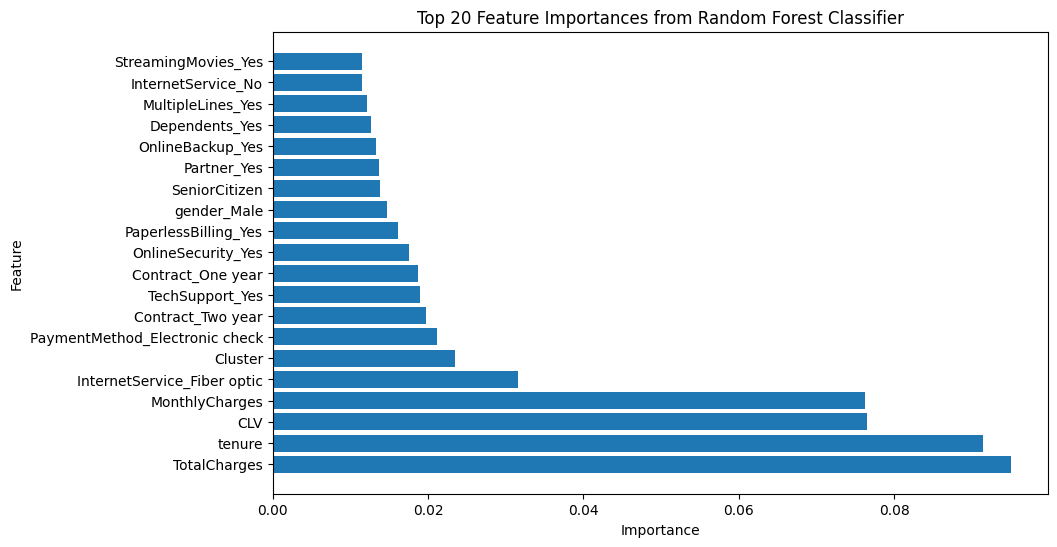

In [ ]:
# Plot the top 20 feature importances
top_20_importances = importances_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_importances['Feature'], top_20_importances['Importance'])
plt.title('Top 20 Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


From the results, derived several useful insights for business and recommendations are as follows:

1. **Gender Distribution**:
   - The gender distribution among customers is fairly balanced, with slightly more males than females. Gender alone does not seem to be a strong indicator of churn.

2. **Senior Citizens**:
   - There is a significant number of non-senior citizens compared to senior citizens among customers.
   - Senior citizens have a higher churn rate compared to non-senior citizens. This indicates that senior citizens may need specific attention or offers to reduce churn.

3. **Proportion of Customers with Partners and Dependents**:
   - Customers with partners and dependents have a lower churn rate compared to those without partners and dependents.
   - The company could focus on promoting family-oriented services or packages to reduce churn among single customers.

4. **Phone Service and Multiple Lines**:
   - Most customers have phone service, and a significant number also have multiple lines.
   - Offering attractive bundles or promotions for phone service could be a strategy to retain customers.

5. **Distribution of Internet Services**:
   - Fiber optic is the most popular internet service, followed by DSL, with a significant number of customers not using internet services.
   - Investigating the quality and pricing of fiber optic services could help reduce churn.

6. **Services Usage**:
   - Customers who do not use additional services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies tend to have higher churn rates.
   - Promoting and enhancing these services could increase customer retention.

7. **Distribution of Contract Types**:
   - The majority of customers are on a month-to-month contract.
   - Encouraging customers to opt for longer-term contracts (e.g., one or two years) could reduce churn.

8. **Paperless Billing**:
   - A significant number of customers have paperless billing.
   - Promoting the benefits of paperless billing could help retain these customers.

9. **Payment Methods**:
   - Electronic check is the most common payment method, followed by mailed check, bank transfer, and credit card.
   - Streamlining the payment process or offering incentives for specific payment methods could be considered.

10. **Churn Rate**:
    - The overall churn rate is approximately 26.6%, indicating a significant churn issue.
    - The company should focus on strategies to reduce this churn rate.

11. **Churn Rate by Gender**:
    - Churn rates by gender are relatively similar.
    - Gender does not appear to be a strong predictor of churn.

12. **Churn Rate by Senior Citizen, Partner, and Dependents**:
    - Churn rates vary significantly based on senior citizen status and partner/dependent status.
    - Senior citizens without partners and dependents have the highest churn rates.
    - Tailoring retention strategies for these specific customer segments is recommended.

13. **Churn Rate vs Tenure**:
    - Customers with lower tenure tend to have higher churn rates.
    - Encouraging longer-term relationships with the company could reduce churn.

14. **Churn Rate vs Services**:
    - Customers who do not use additional services tend to have higher churn rates.
    - Upselling or cross-selling additional services could improve retention.

15. **Churn Rate vs Contract**:
    - Month-to-month contract customers have the highest churn rate.
    - Encouraging customers to sign up for longer-term contracts could reduce churn.

16. **Feature Correlation Matrix**:
    - Monthly charges and total charges are positively correlated. Managing pricing strategies is important to maintain customer satisfaction.

17. **Churn Rates by Services, Contract Terms, and Billing Methods**:
    - Churn rates vary significantly depending on the presence or absence of certain services, contract terms, and billing methods.
    - Optimizing service packages and contract offerings based on these insights could help reduce churn.

18. **Chi-squared test for InternetService**:
    - The chi-squared test indicates that InternetService is significantly associated with churn.
    - Improving internet service quality and pricing may help reduce churn.

19. **Churn Rate per Cluster**:
    - Customers in different clusters exhibit varying churn rates.
    - Tailoring retention strategies for each cluster can be more effective.

20. **Customer Lifetime Value (CLV)**:
    - The average CLV for churned customers is higher than that for non-churned customers. This suggests that higher CLV customers are also more likely to churn.
    - Focusing on long-term relationships with high CLV customers is important.

21. **Model Accuracy and Classification Report**:
    - The predictive model's accuracy is approximately 78.4%.
    - The model has higher precision and recall for class 0 (non-churned) than class 1 (churned), indicating room for improvement in predicting churn.

22. **Most Significant Predictors**:
    - The most significant predictors of churn include InternetService (Fiber optic), PaymentMethod (Electronic check), and MonthlyCharges.



**RECOMMENDATIONS**

Based on these insights, some recommendations for reducing churn and improving customer retention include:

- Developing targeted retention strategies for senior citizens without partners and dependents.
- Promoting long-term contracts with incentives.
- Enhancing internet services, especially Fiber optic, to improve customer satisfaction.
- Cross-selling and upselling additional services.
- Encouraging paperless billing and specific payment methods.
- Investigating and addressing the factors contributing to high MonthlyCharges.